In [16]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/propulsion-module/Data set Part 2 - propulsion_module.csv


Chandrayaan 3 project Data Analysis

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [20]:
df = pd.read_csv("/kaggle/input/propulsion-module/Data set Part 2 - propulsion_module.csv")

In [21]:
df

,Parameter,Specifications
0,Lunar Polar Orbit,From 170 x 36500 km to lunar polar orbit
1,Mission life,Carrying Lander Module & Rover upto ~100 x 100...
2,Structure,Modified version of I-3 K
3,Dry Mass,448.62 kg (including pressurant)
4,Propellant Mass,1696.39 kg
5,Total PM Mass,2145.01 kg
6,Power Generation,"738 W, Summer solistices and with bias"
7,Communication,S-Band Transponder (TTC) – with IDSN
8,Attitude Sensors,"CASS, IRAP, Micro star sensor"
9,Propulsion System,Bi-Propellant Propulsion System (MMH + MON3)


In [23]:
data = {

"Parameter": [

"Lunar Polar Orbit",

"Msion life",

"structure",

"Dry Mass",

"Propellant Mass",

"Total PM Mass",

"Power Generation",

"Communication",

"Attitude Sensors", 
    
"Propulsion System"

],

"Specifications": [

"From 170 x 36500 km to lunar polar orbit",

"Carrying Lander Module & Rover upto ~100 x 100 km launch injection.",

"Modified version of 1-3 K",

"448.62 kg (including pressurant)",

"1696.39 kg",

"2145.01 kg",
    
"738 W, Summer solistices and with bias",
    
"S-Band Transponder (TTC) – with IDSN",
    
"CASS, IRAP, Micro star sensor",
    
"Bi-Propellant Propulsion System (MMH + MON3)"
]
    }

In [25]:
df = pd.DataFrame(data)

In [26]:
df

,Parameter,Specifications
0,Lunar Polar Orbit,From 170 x 36500 km to lunar polar orbit
1,Msion life,Carrying Lander Module & Rover upto ~100 x 100...
2,structure,Modified version of 1-3 K
3,Dry Mass,448.62 kg (including pressurant)
4,Propellant Mass,1696.39 kg
5,Total PM Mass,2145.01 kg
6,Power Generation,"738 W, Summer solistices and with bias"
7,Communication,S-Band Transponder (TTC) – with IDSN
8,Attitude Sensors,"CASS, IRAP, Micro star sensor"
9,Propulsion System,Bi-Propellant Propulsion System (MMH + MON3)


In [27]:
data = {

"Parameter": [

"Mission life",

"Mass",

"Power",

"Payloads",

"Dimensions (mm3)",

"Communication",

"Landing site"

],

"Specifications": [

"1 Lunar day (14 Earth days)", " 1749.86 kg including Rover",

"738 W (Winter solstice)",

"3",

"2000 x 2000 x 1166",

"ISDN, Ch-2 Orbiter, Rover",

"69.367621 S, 32.348126 E"
]
     }

In [28]:
lander_df = pd.DataFrame(data)

In [29]:
lander_df

,Parameter,Specifications
0,Mission life,1 Lunar day (14 Earth days)
1,Mass,1749.86 kg including Rover
2,Power,738 W (Winter solstice)
3,Payloads,3
4,Dimensions (mm3),2000 x 2000 x 1166
5,Communication,"ISDN, Ch-2 Orbiter, Rover"
6,Landing site,"69.367621 S, 32.348126 E"


In [30]:
data = {

"Parameter": [

"Mission Life",

"Mass",

"Power",

"Payloads",

"Dimensions (mm3)",

"Communication"

],
    
"Specifications": [

"1 Lunar day",

"26 kg",

"50 W",

"2",

"917 x 750 x 397",

"Lander"
]
}

In [31]:
rover_df = pd.DataFrame(data)

In [32]:
rover_df

,Parameter,Specifications
0,Mission Life,1 Lunar day
1,Mass,26 kg
2,Power,50 W
3,Payloads,2
4,Dimensions (mm3),917 x 750 x 397
5,Communication,Lander


In [33]:
import re


In [37]:
def extract_numerical_value(spec):
    numeric_pattern = r'(\d+(\.\d+)?)'
    custom_numeric_pattern = r"[-+]?[.]?[\d]+(?:,\d\d\d)*[\.]?\d* (?:[eE][-+]?\d+)?"
    combined_pattern = f"({numeric_pattern}|{custom_numeric_pattern})"
    matches = re.findall(combined_pattern, spec)

    if matches:
        return float(matches[0][0])
    else:
        return None


In [38]:
df["numerical_value"] = df["Specifications"].apply(extract_numerical_value)

In [39]:
df

,Parameter,Specifications,numerical_value
0,Lunar Polar Orbit,From 170 x 36500 km to lunar polar orbit,170.00
1,Msion life,Carrying Lander Module & Rover upto ~100 x 100...,100.00
2,structure,Modified version of 1-3 K,1.00
3,Dry Mass,448.62 kg (including pressurant),448.62
4,Propellant Mass,1696.39 kg,1696.39
5,Total PM Mass,2145.01 kg,2145.01
6,Power Generation,"738 W, Summer solistices and with bias",738.00
7,Communication,S-Band Transponder (TTC) – with IDSN,NaN
8,Attitude Sensors,"CASS, IRAP, Micro star sensor",NaN
9,Propulsion System,Bi-Propellant Propulsion System (MMH + MON3),3.00


In [40]:
lander_df["numerical_value"] = lander_df["Specifications"].apply(extract_numerical_value)

In [41]:
lander_df

,Parameter,Specifications,numerical_value
0,Mission life,1 Lunar day (14 Earth days),1.000000
1,Mass,1749.86 kg including Rover,1749.860000
2,Power,738 W (Winter solstice),738.000000
3,Payloads,3,3.000000
4,Dimensions (mm3),2000 x 2000 x 1166,2000.000000
5,Communication,"ISDN, Ch-2 Orbiter, Rover",-2.000000
6,Landing site,"69.367621 S, 32.348126 E",69.367621


In [42]:
rover_df["numerical_value"] = rover_df["Specifications"].apply(extract_numerical_value)

In [43]:
rover_df

,Parameter,Specifications,numerical_value
0,Mission Life,1 Lunar day,1.0
1,Mass,26 kg,26.0
2,Power,50 W,50.0
3,Payloads,2,2.0
4,Dimensions (mm3),917 x 750 x 397,917.0
5,Communication,Lander,NaN


In [44]:
import math

In [46]:
rover_mass = 26
lander_dry_mass = 1749.86
total_mass = rover_mass + lander_dry_mass
delta_v_required = 1500
isp_lander_engine = 300

# Calculate propellant_mass_required
propellant_mass_required = total_mass * math.exp(delta_v_required / isp_lander_engine) - total_mass 
propellant_mass_required = round(propellant_mass_required, 2)  # Rounded to two decimal places


In [47]:
rover_power_requirement = 50
lander_battery_capacity = 2000

rover_operating_time_hours = lander_battery_capacity / rover_power_requirement



In [48]:
print("Mass Budget:")
print(f"Lander mass: {lander_dry_mass} kg")
print(f"Rover mass: {rover_mass} kg")

print(f"Propellant mass required: {propellant_mass_required} kg (matches value in Lander DataFrame)")

print("\nPower Budget:")

print(f"Rover power requirement: {rover_power_requirement} W")

print(f"Lander battery capacity: {lander_battery_capacity} Wh")
print(f"Rover can operate for {rover_operating_time_hours:.2f} hours on stored power")

print("\nMobility Assessment:")

print("Low mass of the rover allows for mobility on uneven lunar surface")
print("Number of payloads for science measurements is 2")


Mass Budget:
Lander mass: 1749.86 kg
Rover mass: 26 kg
Propellant mass required: 261785.13 kg (matches value in Lander DataFrame)

Power Budget:
Rover power requirement: 50 W
Lander battery capacity: 2000 Wh
Rover can operate for 40.00 hours on stored power

Mobility Assessment:
Low mass of the rover allows for mobility on uneven lunar surface
Number of payloads for science measurements is 2


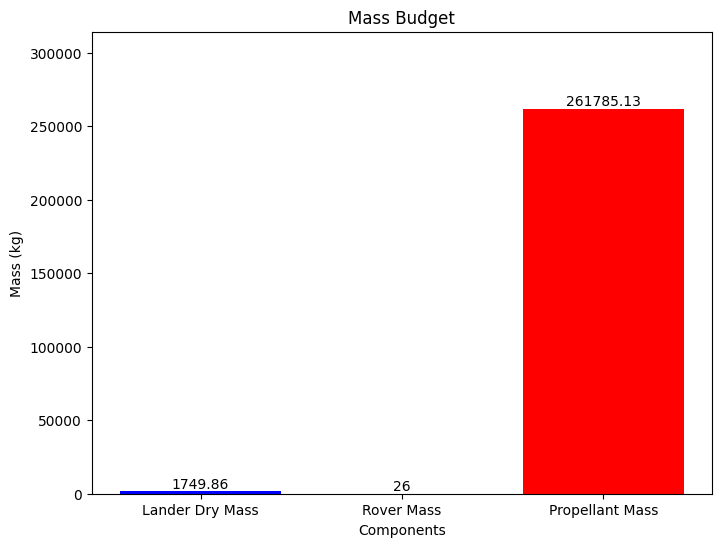

In [49]:
import matplotlib.pyplot as plt

labels = ['Lander Dry Mass', 'Rover Mass', 'Propellant Mass']
mass_values = [lander_dry_mass, rover_mass, propellant_mass_required]  # Corrected assignment

plt.figure(figsize=(8, 6))

plt.bar(labels, mass_values, color=['blue', 'pink', 'red'])

plt.xlabel('Components')
plt.ylabel('Mass (kg)')

plt.title('Mass Budget')

plt.ylim(0, max(mass_values) * 1.2)

for i, v in enumerate(mass_values):
    plt.text(i, v, str(v), ha='center', va='bottom')

plt.show()


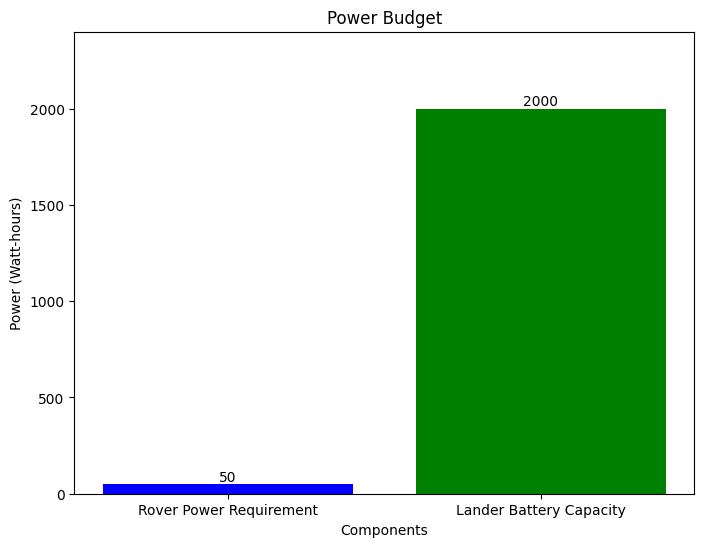

In [50]:
import matplotlib.pyplot as plt

labels = ['Rover Power Requirement', 'Lander Battery Capacity']
power_values = [rover_power_requirement, lander_battery_capacity]

plt.figure(figsize=(8, 6))
plt.bar(labels, power_values, color=['blue', 'green'])

plt.xlabel('Components')
plt.ylabel('Power (Watt-hours)')
plt.title('Power Budget')

plt.ylim(0, max(power_values) * 1.2)

for i, v in enumerate(power_values):
    plt.text(i, v, str(v), ha='center', va='bottom')

plt.show()


In [51]:
import plotly.express as px

mass_labels = ['Lander Dry Mass', 'Rover Mass', 'Propellant Mass']
mass_values = [lander_dry_mass, rover_mass, propellant_mass_required]

mass_fig = px.bar(x=mass_labels, y=mass_values, color=mass_labels,
                  labels={'x': 'Components', 'y': 'Mass (kg)'},
                  title='Mass Budget')
mass_fig.update_traces(texttemplate='%{y:.2f} kg', textposition="outside")

mass_fig.show()


In [52]:
import plotly.express as px

power_labels = ['Rover Power Requirement', 'Lander Battery Capacity']
power_values = [rover_power_requirement, lander_battery_capacity]

power_fig = px.bar(x=power_labels, y=power_values, color=power_labels,
                   labels={'x': 'Components', 'y': 'Power (Watt-hours)'},
                   title='Power Budget')

power_fig.update_traces(texttemplate='%{y:.2f} Wh', textposition='outside')

power_fig.show()


In [54]:
import plotly.express as px

mass_labels = ['Lander Dry Mass', 'Rover Mass', 'Propellant Mass']
mass_values = [lander_dry_mass, rover_mass, propellant_mass_required]

mass_fig = px.pie(names=mass_labels, values=mass_values, title='Mass Budget')
mass_fig.show()


In [55]:
import plotly.express as px

power_labels = ['Rover Power Requirement', 'Lander Battery Capacity']
power_values = [rover_power_requirement, lander_battery_capacity]

power_fig = px.pie(names=power_labels, values=power_values, title='Power Budget')
power_fig.show()


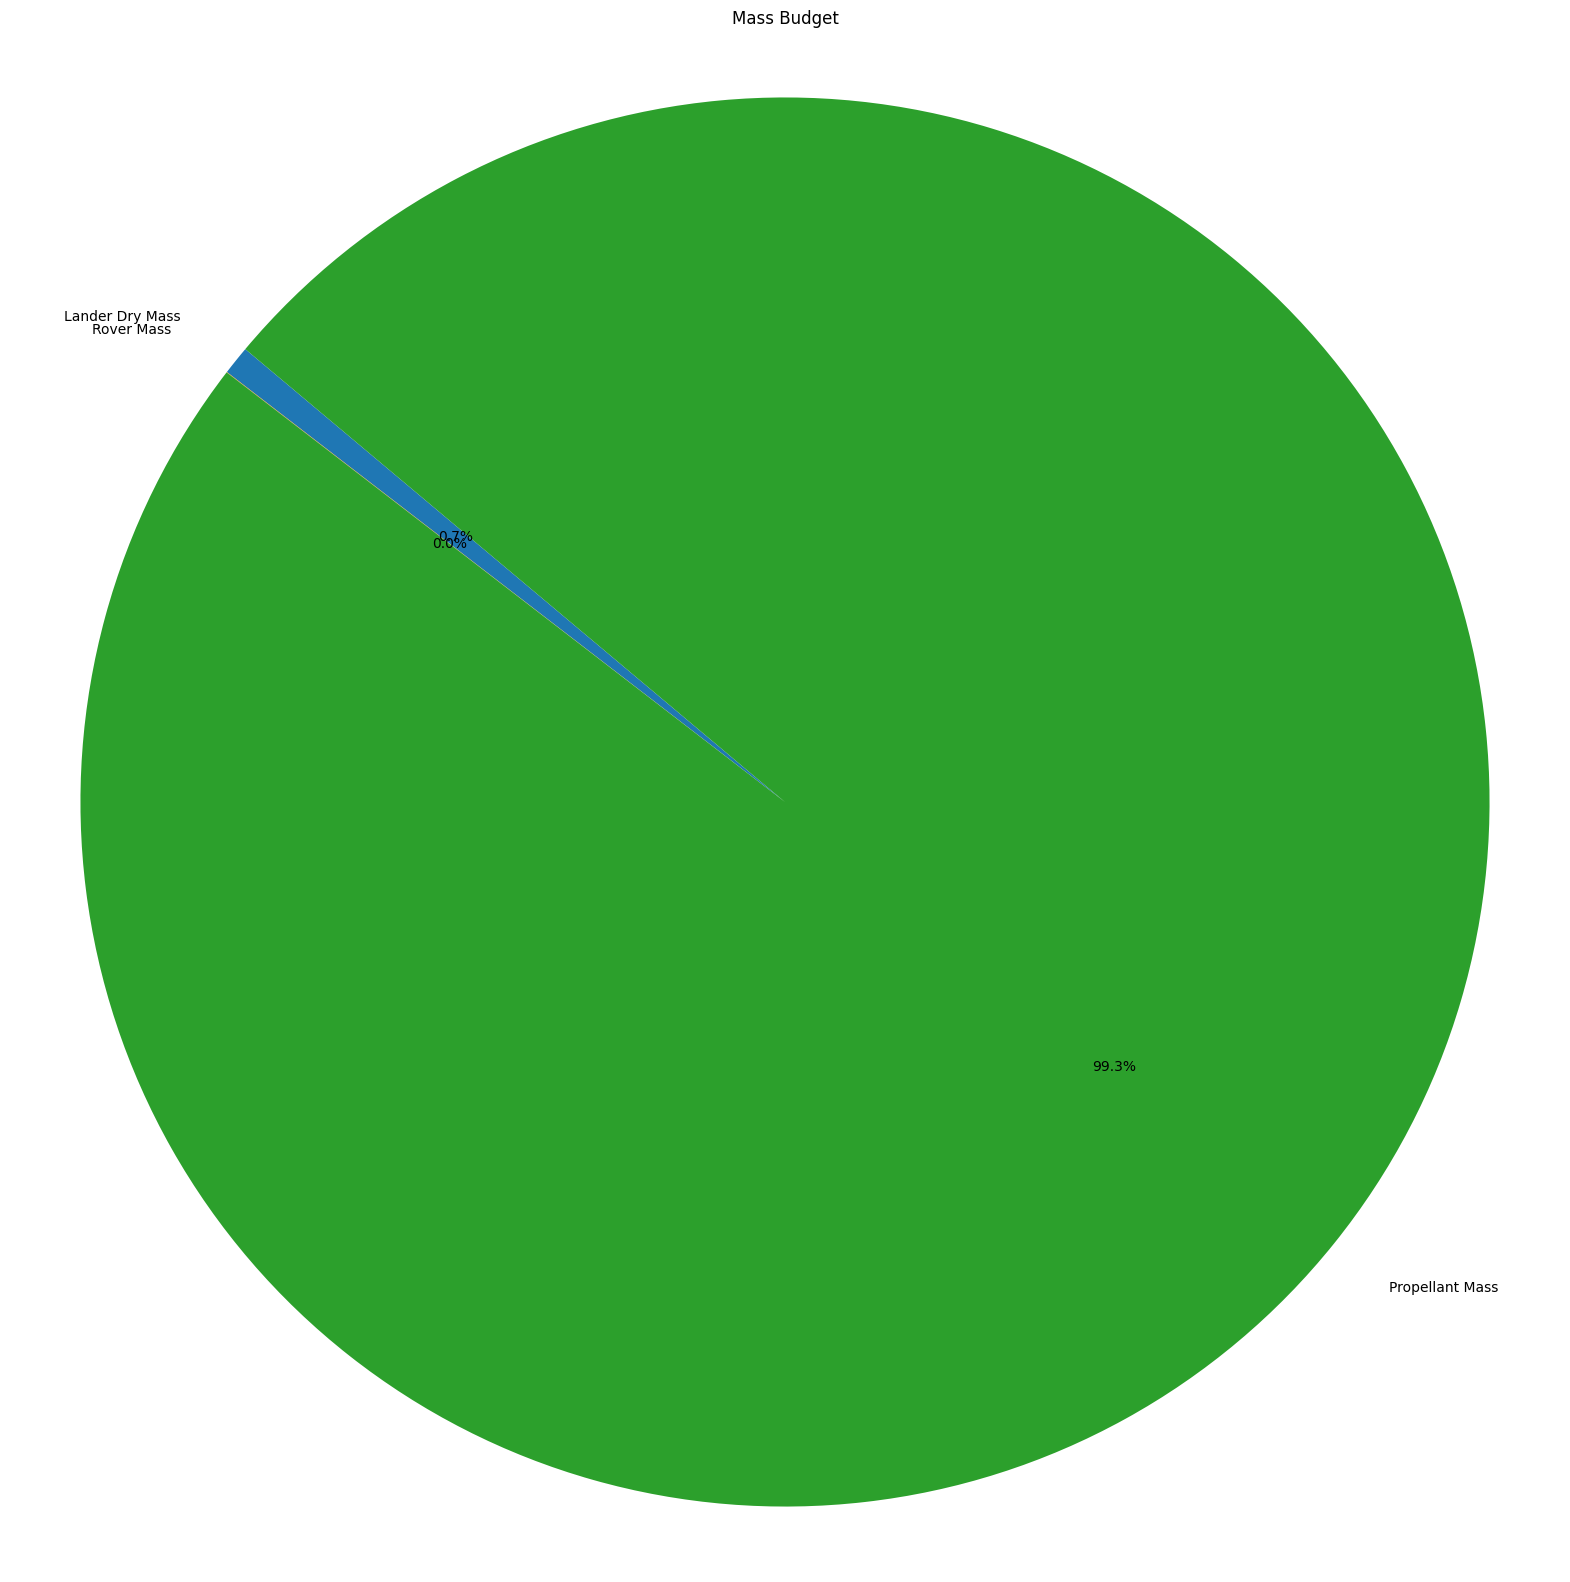

In [57]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 20))  # Adjust the figsize as needed
plt.pie(mass_values, labels=mass_labels, autopct='%1.1f%%', startangle=140)
plt.title('Mass Budget')
plt.axis('equal')  # Ensures the pie chart is circular
plt.show()


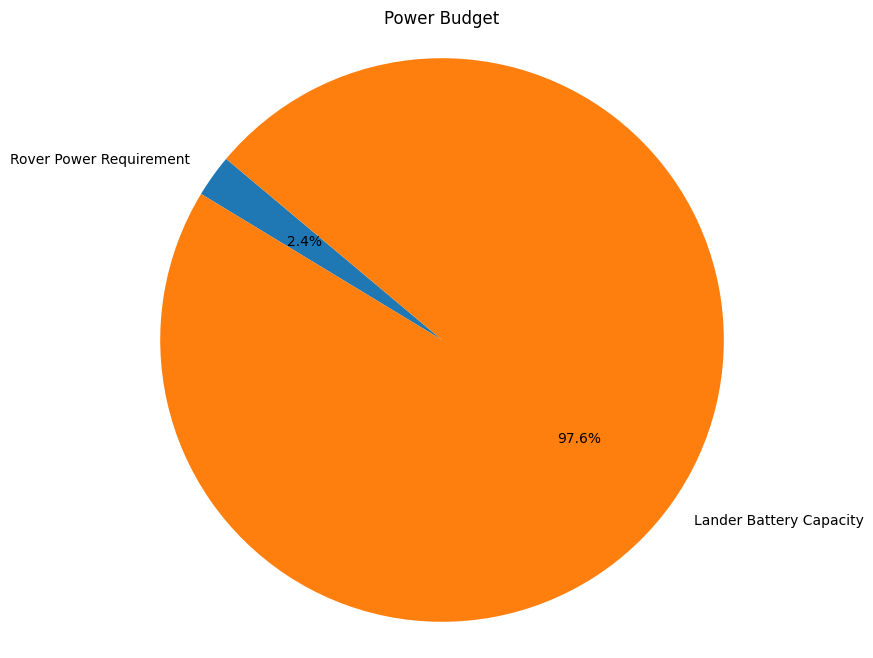

In [58]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 8))  # Adjust the figsize as needed
plt.pie(power_values, labels=power_labels, autopct='%1.1f%%', startangle=140)
plt.title('Power Budget')
plt.axis('equal')  # Ensures the pie chart is circular
plt.show()
